# Notebook for exploring the vihsd dataset

## Import libraries and load data

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import emoji

In [3]:
# Load data
train = pd.read_csv('../Dataset/vihsd/train.csv')
test = pd.read_csv('../Dataset/vihsd/test.csv')
dev = pd.read_csv('../Dataset/vihsd/dev.csv')

data = pd.concat([train, test, dev])

## Data overview

In [4]:
# Data exploration
data.head()

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [5]:
print(data['label_id'].value_counts())

label_id
0    27624
2     3514
1     2262
Name: count, dtype: int64


In [6]:
print(data['free_text'].value_counts())

free_text
#ERROR!                                                                                                                                                                                    17
Vl                                                                                                                                                                                          5
:)))                                                                                                                                                                                        4
:))                                                                                                                                                                                         4
Già mà non                                                                                                                                                                                  4
                                        

## Missing & duplicate values

In [7]:
# Missing values
data.isnull().sum()

free_text    2
label_id     0
dtype: int64

In [8]:
# "#ERROR!" in free_text
data['free_text'] = data['free_text'].fillna('')
error_rows = data[data['free_text'].str.contains("#ERROR!")]
print(error_rows)

      free_text  label_id
1729    #ERROR!         0
1867    #ERROR!         0
3568    #ERROR!         0
10788   #ERROR!         0
11218   #ERROR!         0
11674   #ERROR!         0
15413   #ERROR!         0
16080   #ERROR!         0
18660   #ERROR!         2
20848   #ERROR!         1
4155    #ERROR!         0
4654    #ERROR!         0
5139    #ERROR!         0
5392    #ERROR!         0
351     #ERROR!         0
1155    #ERROR!         0
2449    #ERROR!         0


In [9]:
# Duplicate rows
duplicate_rows = data[data['free_text'].duplicated()]
print(duplicate_rows)

                                              free_text  label_id
225                                    reaction thầy ơi         0
442                          đặt khô gà ở đâu v thầy ơi         0
466                                    Mệt quá thầy ạ 😞         0
696                                               xin ạ         0
790                           Tại sao phải trả lời thầy         0
...                                                 ...       ...
2641                   Thùy Linh ủa từ Cùi Bắp của m mà         0
2647                                   Mua quần luôn đi         0
2655            Ngô Tấn Hưng ire 4/1 kêu chơi với lính?         0
2665                                        Nhà vô địch         0
2670  Bao nhiêu ae ra đảo giờ chưa về hôm bữa theo 1...         0

[2797 rows x 2 columns]


In [10]:
# Number of unique values in free_text
num_unique_values = data['free_text'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

30603/33400


## Distribution

In [11]:
data['sentence_length'] = data['free_text'].apply(len)
print(data['sentence_length'].describe())

count    33400.000000
mean        48.919162
std        159.256859
min          0.000000
25%         20.000000
50%         33.000000
75%         56.000000
max      20816.000000
Name: sentence_length, dtype: float64


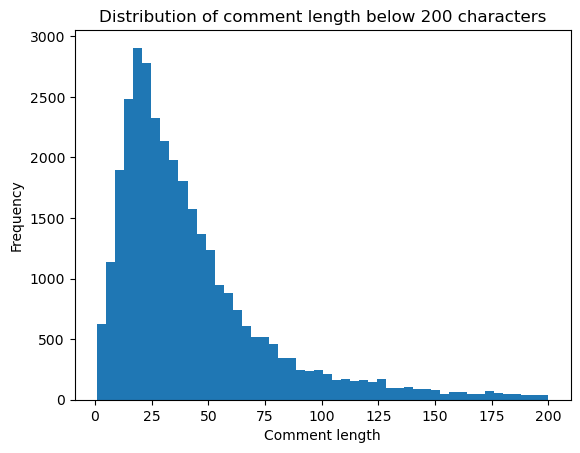

In [12]:
plt.hist(data['sentence_length'], bins=50, range=[1, 200])
plt.title('Distribution of comment length below 200 characters')
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.show()

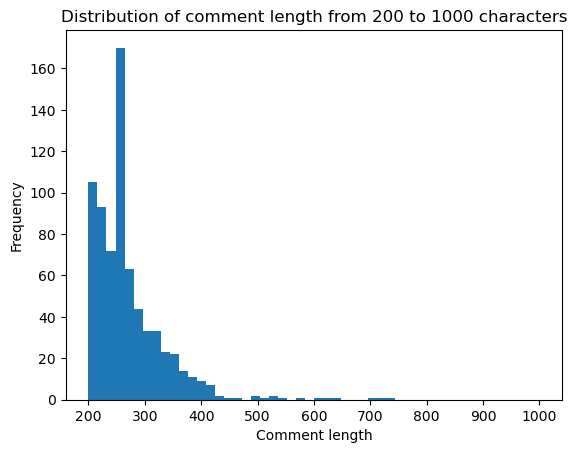

In [13]:
plt.hist(data['sentence_length'], bins=50, range=([200, 1000]))
plt.title('Distribution of comment length from 200 to 1000 characters')
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.show()

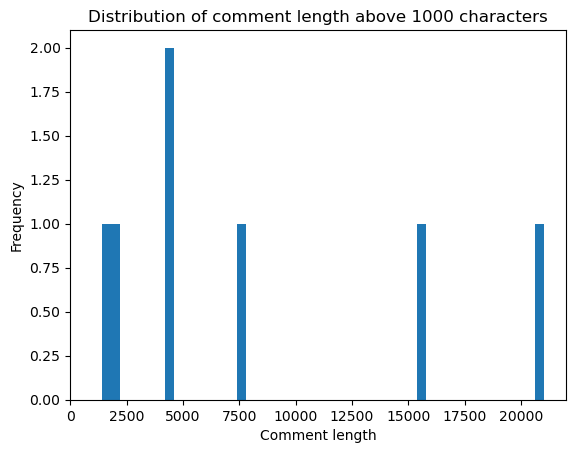

In [14]:
plt.hist(data['sentence_length'], bins=50, range=([1000, 21000]))
plt.title('Distribution of comment length above 1000 characters')
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.show()

## Wordcloud

In [15]:
# Join all the text in 'free_text' into a single string
toxic_text = ' '.join(data[data['label_id'].isin([1, 2])]['free_text'])
nontoxic_text = ' '.join(data[data['label_id'] == 0]['free_text'])

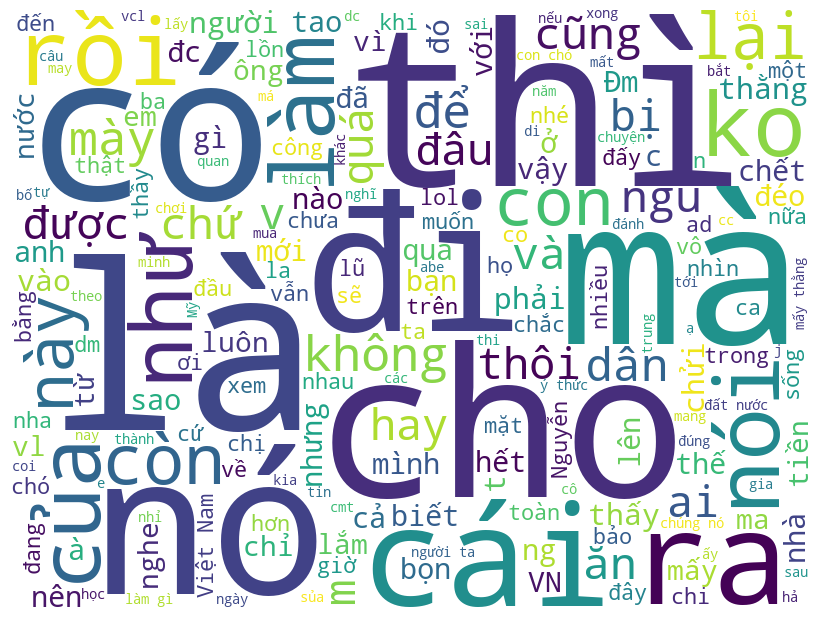

In [16]:
# Toxic observations
wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10).generate(toxic_text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

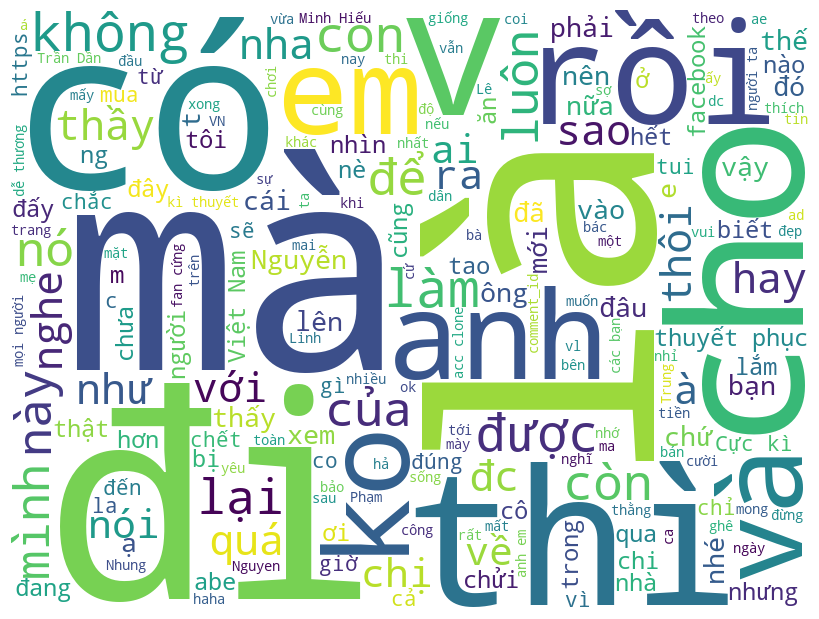

In [17]:
# Non-toxic observations
wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10).generate(nontoxic_text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Some special examples

In [18]:
print(data[data['sentence_length']==1])

     free_text  label_id  sentence_length
103          😞         0                1
242          .         0                1
299          🙃         0                1
715          😑         0                1
1386         H         0                1
...        ...       ...              ...
1747         👍         0                1
1768         Ớ         0                1
2007         Ồ         0                1
2037         2         0                1
2265         X         0                1

[111 rows x 3 columns]


In [19]:
print(data[data['sentence_length'] == 2])

     free_text  label_id  sentence_length
188         :3         0                2
1073        Vc         0                2
1218        mn         0                2
1495        Dạ         0                2
2048        Má         1                2
...        ...       ...              ...
1881        Kk         0                2
2089        Mk         0                2
2200        Mẹ         0                2
2299        BD         0                2
2632        :v         0                2

[143 rows x 3 columns]


In [20]:
print(data[data['sentence_length'] >= 1000])

                                               free_text  label_id  \
5100   📌https://www.facebook.com/thexuandoan/about\n ...         0   
10619  🏆 https://www.facebook.com/thexuandoan/posts\n...         0   
16963  v\n https://www.facebook.com/thansau.8386?comm...         0   
17127  Bộ Giao Thông Đường Bộ của Úc chỉ quy định 3 l...         0   
19402  Về bờ trong ngày . Liên hệ ngay fb\n 📌https://...         0   
19847  📌https://www.facebook.com/thexuandoan/about\n ...         0   
6082   Trong thới giới thứ 3 những người đáng được tô...         0   

       sentence_length  
5100              4328  
10619             1879  
16963            15420  
17127             7712  
19402            20816  
19847             4328  
6082              1762  
